# Random Sample Imputation

Aim : Random Sample imputation consists of taking random observations from the dataset and we use this observation to replace the NaN values
Assumption : Data Missing Completely at Random (MCAR)

In [1]:
import pandas as pd
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
median = df['Age'].median()
median

28.0

In [5]:
df['Age'].dropna().sample()

207    26.0
Name: Age, dtype: float64

In [6]:
# Random sample to fill na
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
def impute_nan(df, variable, mean):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [8]:
impute_nan(df, 'Age', median)
df.head(40)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

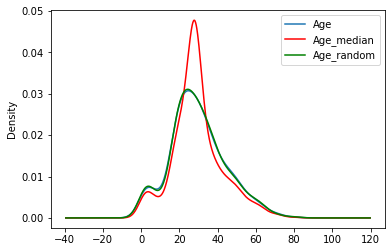

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Capturing NAN values with a new feature

Wherever data is not completely missing in random

In [15]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


#### Age_NAN column is used to keep track on missing values

In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


# End of Distribution Imputation

In [21]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

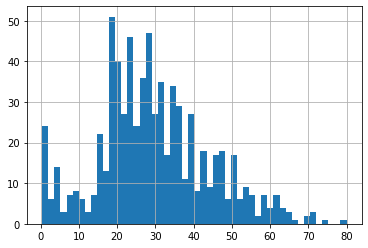

In [22]:
df['Age'].hist(bins=50)

In [23]:
df['Age'].mean()

29.69911764705882

In [27]:
#Outlier
# Mean + 3 * standard_deviation
extreme = df['Age'].mean() + 3*df['Age'].std()
median = df['Age'].median()

/Users/kshitij/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

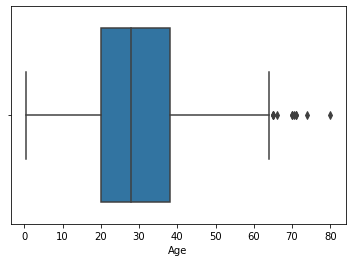

In [25]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [28]:
def impute_nan(df, variable, median, extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [29]:
impute_nan(df, 'Age', median, extreme)
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

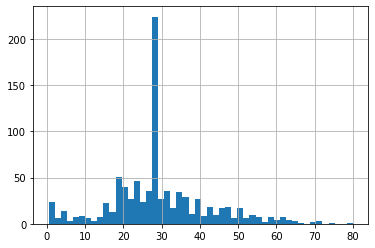

In [33]:
df['Age'].hist(bins=50)

<AxesSubplot:>

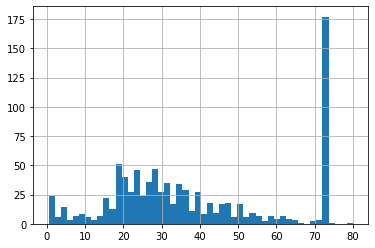

In [34]:
df['Age_end_distribution'].hist(bins=50)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

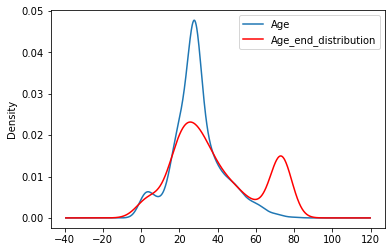

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_end_distribution.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/Users/kshitij/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

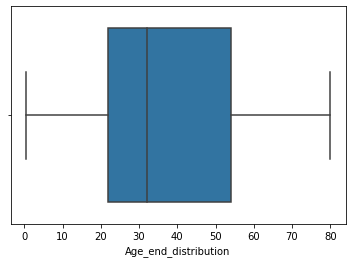

In [35]:
import seaborn as sns
sns.boxplot('Age_end_distribution', data=df)

##### All the outliers are removed

# Live Session 3

## Arbitrary Value Imputation

Replacing NAN by an arbitrary value

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

In [5]:
# Arbitrary values points to remember
# 1. It should be more frequently present


In [6]:
impute_nan(df,'Age')

In [7]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [9]:
import matplotlib.pyplot as plt

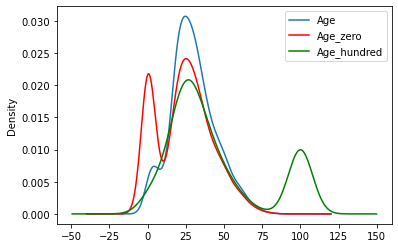

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_zero.plot(kind='kde', ax=ax, color='red')
df.Age_hundred.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# How to handle Categorical missing values

### 1. Frequent Category Imputation

In [11]:
import pandas as pd

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df = pd.read_csv('loan_train.csv', usecols= ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [19]:
df.shape

(1460, 4)

In [16]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [18]:
# Sorting the percentages
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

BsmtQual and GarageType are having less number of missing values, hence NAN values can be replaced by frequent element

## Compute Frequency

In [20]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [24]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [21]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

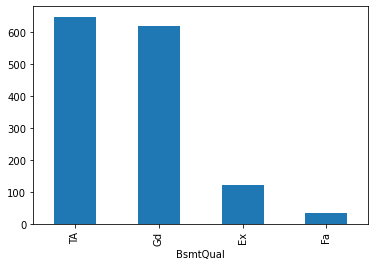

In [23]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

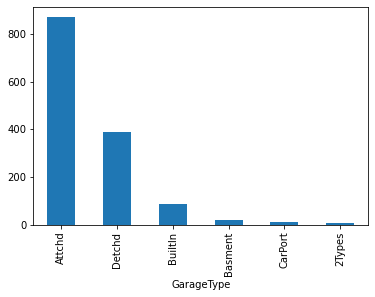

In [25]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:xlabel='FireplaceQu'>

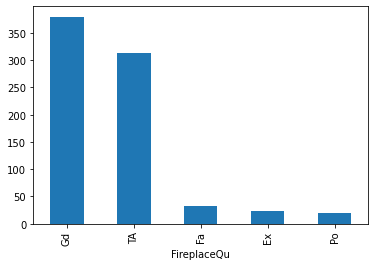

In [26]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending = False).plot.bar()

In [28]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [29]:
### Imputation Function
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [30]:
for feature in (['BsmtQual', 'GarageType']):
    impute_nan(df, feature)

In [32]:
# All the NAN values for ['BsmtQual', 'GarageType'] are removed
df.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.472603
GarageType     0.000000
SalePrice      0.000000
dtype: float64

## Adding a variable to capture NAN

In [34]:
import numpy as np
df = pd.read_csv('loan_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [35]:
df['BsmtQual_NAN'] = np.where(df['BsmtQual'].isnull(), 1, 0)
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_NAN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [36]:
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [37]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [38]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_NAN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [39]:
df['FireplaceQu_NAN'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [40]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_NAN,FireplaceQu_NAN
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [42]:
df = pd.read_csv('loan_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [47]:
def impute_nan(df, variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'Missing',df[variable])

In [50]:
for feature in (['BsmtQual', 'GarageType', 'FireplaceQu']):
    impute_nan(df, feature)

In [51]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,GarageType_newvar,FireplaceQu_newvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


#### After this we drop old columns

In [54]:
df = df.drop(['BsmtQual', 'GarageType', 'FireplaceQu'], axis=1)

In [55]:
df.head()

,SalePrice,BsmtQual_newvar,GarageType_newvar,FireplaceQu_newvar
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
